In [178]:
import json
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import pandas as pd
import seaborn as sns

In [83]:
# my team name
username = 'bsting'

In [84]:
df = pd.read_json('.\data\kaggle_pii_data_detection_leaderboard.json')
df.head()

,publicLeaderboard,privateLeaderboard,teams
0,"{'teamId': 11524960, 'submissionId': 37590846,...","{'teamId': 11537455, 'submissionId': 37602413,...","{'teamId': 11518343, 'teamName': 'sample_submi..."
1,"{'teamId': 11531419, 'submissionId': 37621242,...","{'teamId': 11527534, 'submissionId': 37516863,...","{'teamId': 11526387, 'teamName': 'Kanchana1990..."
2,"{'teamId': 11573543, 'submissionId': 37607168,...","{'teamId': 11530020, 'submissionId': 37631546,...","{'teamId': 11526478, 'teamName': 'Team +1', 's..."
3,"{'teamId': 11545847, 'submissionId': 37571294,...","{'teamId': 11594159, 'submissionId': 37644809,...","{'teamId': 11527962, 'teamName': 'LWOLWO', 'su..."
4,"{'teamId': 11536196, 'submissionId': 37629521,...","{'teamId': 11524960, 'submissionId': 37646780,...","{'teamId': 11543240, 'teamName': 'Youssef Ouer..."


When we submit to a Kaggle competition, we get 2 scores: the public score and the private score.
- The public score is calculated by using approx. 20% of the test data.
- The private score is calculated by using approx. 80% of the test data.

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2071 entries, 0 to 2070
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   publicLeaderboard   2071 non-null   object
 1   privateLeaderboard  2071 non-null   object
 2   teams               2071 non-null   object
dtypes: object(3)
memory usage: 48.7+ KB


In [86]:
df_team = pd.json_normalize(df['teams'])
df_team.head()

,teamId,teamName,isBenchmark,submissionCount,lastSubmissionDate,teamMembers,writeUpForumTopicId
0,11518343,sample_submission.csv,True,1,2024-01-16T19:04:10.736666700Z,NaN,NaN
1,11526387,Kanchana1990,NaN,8,2024-01-24T18:35:46.970Z,"[{'id': 11747684, 'displayName': 'Kanchana1990...",NaN
2,11526478,Team +1,NaN,2,2024-01-18T12:13:57.130Z,"[{'id': 14435659, 'displayName': 'pakapro', 'i...",NaN
3,11527962,LWOLWO,NaN,5,2024-01-19T07:32:51.410Z,"[{'id': 12406882, 'displayName': 'LWOLWO', 'im...",NaN
4,11543240,Youssef Ouertani,NaN,5,2024-01-26T20:51:29.723333300Z,"[{'id': 6498106, 'displayName': 'Youssef Ouert...",NaN


In [87]:
df_team = df_team[['teamId', 'teamName', 'submissionCount']]
df_team = df_team.rename(columns={'teamId': 'team_id', 'teamName': 'team_name', 'submissionCount': 'submission_count'})

In [88]:
df_public = pd.json_normalize(df['publicLeaderboard'])
df_public.head()

,teamId,submissionId,rank,displayScore,medal,inTheMoney
0,11524960,37590846,1.0,0.984,GOLD,True
1,11531419,37621242,2.0,0.983,GOLD,True
2,11573543,37607168,3.0,0.983,GOLD,True
3,11545847,37571294,4.0,0.983,GOLD,NaN
4,11536196,37629521,5.0,0.982,GOLD,NaN


In [89]:
df_public = df_public[['teamId', 'rank', 'displayScore']]
df_public = df_public.rename(columns={'teamId': 'team_id', 'rank':'public_rank', 'displayScore':'public_score'})

In [90]:
df_private = pd.json_normalize(df['privateLeaderboard'])
df_private.head()

,teamId,submissionId,rank,displayScore,medal,inTheMoney
0,11537455,37602413,1.0,0.969,GOLD,True
1,11527534,37516863,2.0,0.969,GOLD,True
2,11530020,37631546,3.0,0.969,GOLD,True
3,11594159,37644809,4.0,0.969,GOLD,NaN
4,11524960,37646780,5.0,0.968,GOLD,NaN


In [91]:
df_private = df_private[['teamId', 'rank', 'displayScore']]

In [92]:
df_private = df_private.rename(columns={'teamId': 'team_id', 'rank':'private_rank', 'displayScore':'private_score'})

In [117]:
df_leaderboard = df_team.merge(df_public, left_on='team_id', right_on='team_id')
df_leaderboard = df_leaderboard.merge(df_private, left_on='team_id', right_on='team_id')
df_leaderboard.head()

,team_id,team_name,submission_count,public_rank,public_score,private_rank,private_score
0,11518343,sample_submission.csv,1,NaN,0.000,NaN,0.000
1,11526387,Kanchana1990,8,2031.0,0.000,2032.0,0.000
2,11526478,Team +1,2,2028.0,0.000,2029.0,0.000
3,11527962,LWOLWO,5,2029.0,0.000,2030.0,0.000
4,11543240,Youssef Ouertani,5,2032.0,0.000,2033.0,0.000


In [118]:
# drop benchmark record
df_leaderboard = df_leaderboard.iloc[1:]
df_leaderboard.head()

,team_id,team_name,submission_count,public_rank,public_score,private_rank,private_score
1,11526387,Kanchana1990,8,2031.0,0.000,2032.0,0.000
2,11526478,Team +1,2,2028.0,0.000,2029.0,0.000
3,11527962,LWOLWO,5,2029.0,0.000,2030.0,0.000
4,11543240,Youssef Ouertani,5,2032.0,0.000,2033.0,0.000
5,11544302,zofia mil,1,2065.0,0.000,2065.0,0.000


In [119]:
df_leaderboard.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2070 entries, 1 to 2070
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   team_id           2070 non-null   int64  
 1   team_name         2070 non-null   object 
 2   submission_count  2070 non-null   int64  
 3   public_rank       2070 non-null   float64
 4   public_score      2070 non-null   object 
 5   private_rank      2070 non-null   float64
 6   private_score     2070 non-null   object 
dtypes: float64(2), int64(2), object(3)
memory usage: 113.3+ KB


In [120]:
# convert public_score and private_score to float64
df_leaderboard.public_score = df_leaderboard.public_score.astype('float64')
df_leaderboard.private_score = df_leaderboard.private_score.astype('float64')

In [121]:
# get my record
my_record = df_leaderboard[df_leaderboard['team_name']==username]
my_record

,team_id,team_name,submission_count,public_rank,public_score,private_rank,private_score
878,11925046,bsting,36,1193.0,0.957,1094.0,0.948


In [122]:
# check stats
df_leaderboard[['submission_count', 'public_score','private_score']].describe()

,submission_count,public_score,private_score
count,2070.000000,2070.000000,2070.000000
mean,27.399034,0.885106,0.871723
std,57.080884,0.197835,0.194414
min,1.000000,0.000000,0.000000
25%,2.000000,0.910000,0.878000
50%,6.000000,0.964000,0.950000
75%,24.000000,0.968000,0.957000
max,490.000000,0.984000,0.969000


My score fall into the range of 25% to 50% for both public and private leaderboard :-(

In [153]:
# get submission count range
def get_submission_range(count):
    counter = int(count/50)
    if counter == 0:
        return "Less than 50"
    else:
        start = counter * 50
        end = (counter + 1) * 50
        return f"Between {start} and {end}"

df_leaderboard['submission_range']= df_leaderboard.submission_count.apply(lambda row: get_submission_range(row))

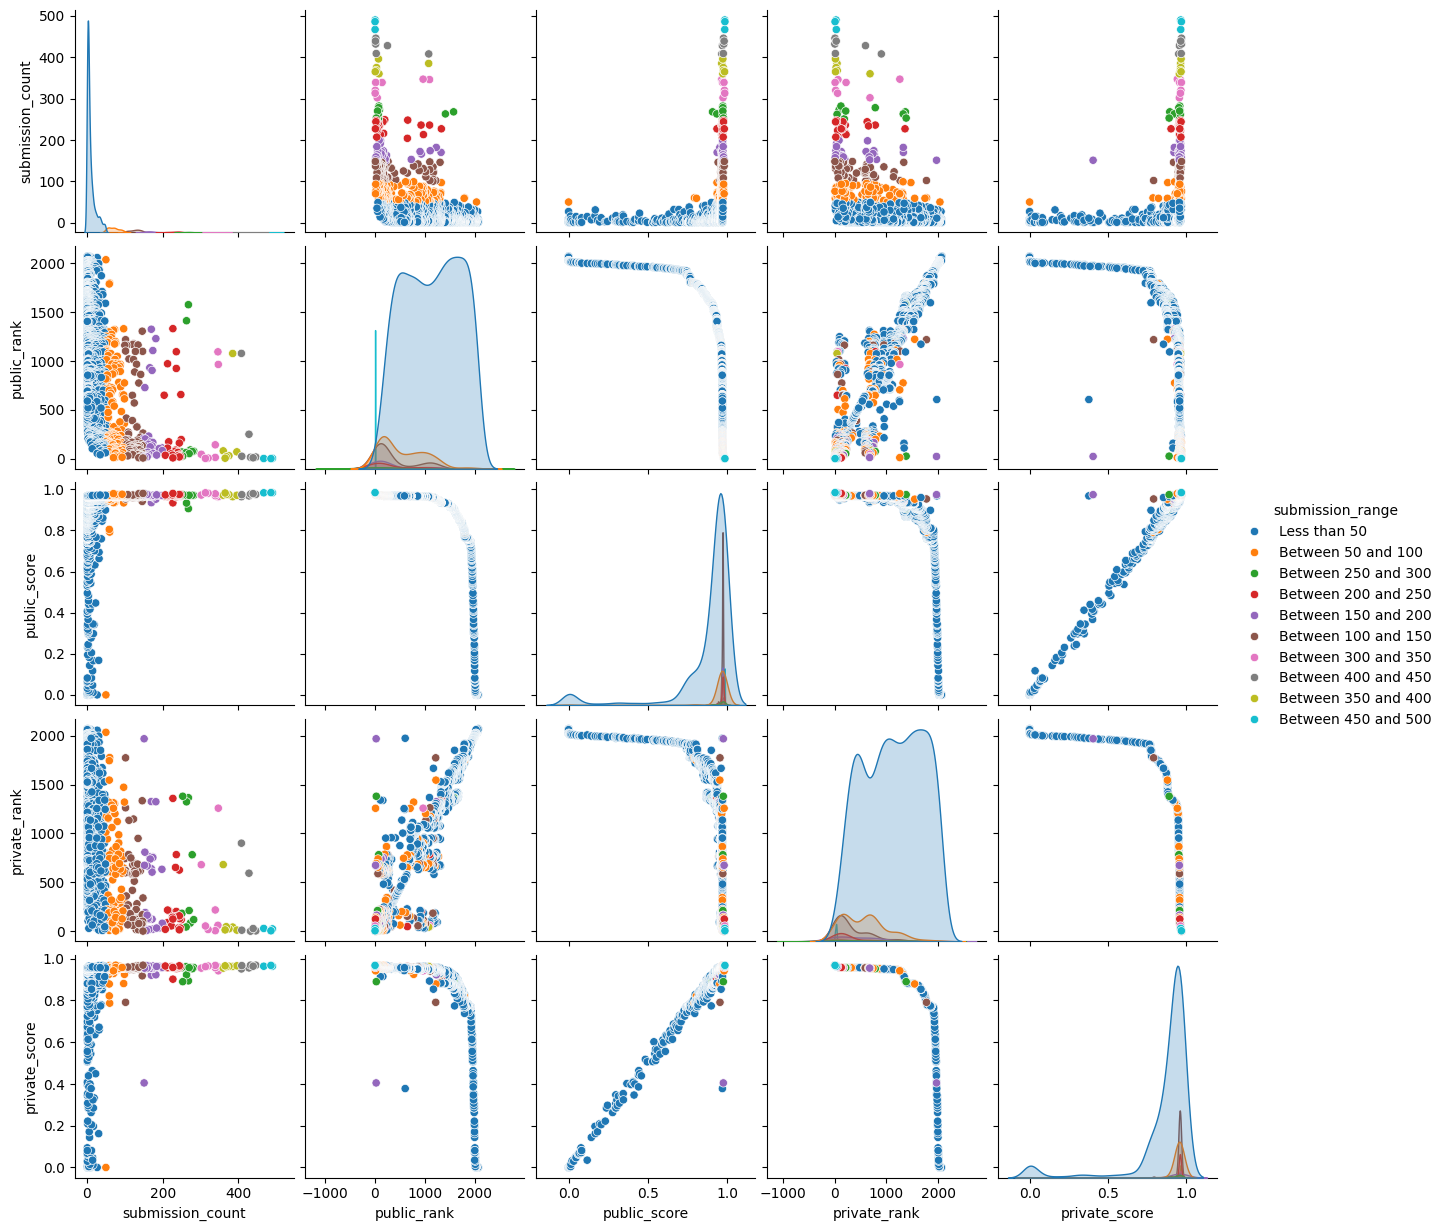

In [154]:
sns.pairplot(df_leaderboard.drop(['team_id'], axis=1), hue='submission_range')
plt.show()

- score variation between rankings from 1 to 1000 is modest, whereas the scores for rankings beyond 1000 exhibit greater variability on both the public and private leaderboards
- private score is positive correlated with public score, but there are a few outliers. These outliers appear to be overfitting to the public test data and performing poorly on the private test data.
- many models that ranked below 200 on the public leaderboard perform poorly on the private leaderboard, falling beyond 500.
- participants who submit more tend to achieve better scores with more hyperparameter tuning and model selection.

In [248]:
def plot_box(data, x, title, color):
    figplot = sns.boxplot(data=df_leaderboard, x=x, color=color)

    median = df_leaderboard[x].median()
    figplot.annotate(f'Median: {median}', 
                         xy=(median, 0.25), 
                         xytext=(0.5, 0.25), 
                         fontsize=10, 
                         color='blue', 
                         arrowprops=dict(arrowstyle= '->', color='green', lw=1.0, ls='--'))

    figplot.annotate(f'My Score: {my_record[x].item()}', 
                         xy=(median, -0.25), 
                         xytext=(0.5, -0.25), 
                         fontsize=10, 
                         color='blue', 
                         arrowprops=dict(arrowstyle= '->', color='red', lw=1.0, ls='--'))

    figplot.set_title(title)
    figplot.set_xlabel("Score")
    plt.show()

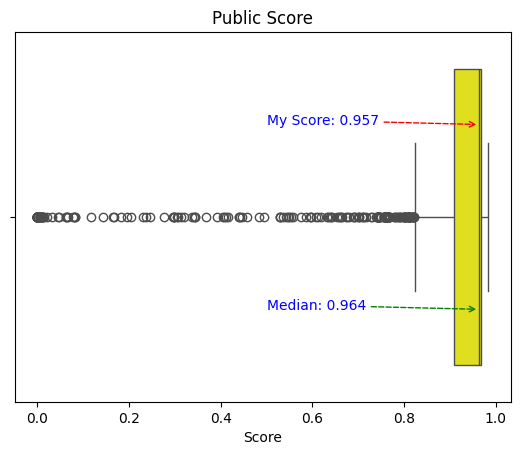

In [249]:
plot_box(df_leaderboard, 'public_score', "Public Score", 'yellow')

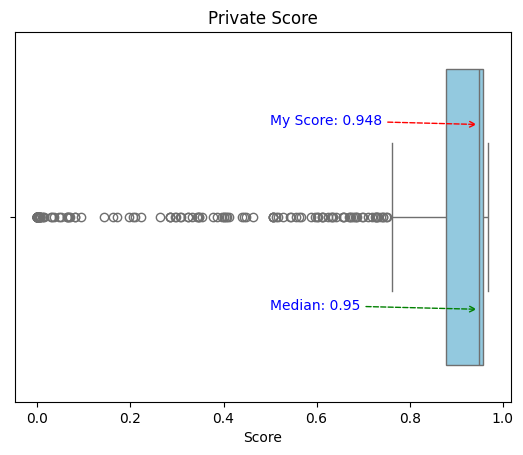

In [254]:
plot_box(df_leaderboard, 'private_score', "Private Score", 'skyblue')